In [1]:

from bs4 import BeautifulSoup
import urllib
from urllib.request import Request,urlopen
import user_agent
import ssl
import requests
import urllib.request
context = ssl.SSLContext(ssl.PROTOCOL_TLSv1_2)


/tmp/ipykernel_15198/1306082646.py:8: DeprecationWarning: ssl.PROTOCOL_TLSv1_2 is deprecated
  context = ssl.SSLContext(ssl.PROTOCOL_TLSv1_2)


In [4]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options
from bs4 import BeautifulSoup

# Set up the Selenium WebDriver
chrome_options = Options()
chrome_options.add_argument('--headless')  # Run Chrome in headless mode (no GUI)
chrome_options.add_argument('--disable-gpu')  # Disable GPU acceleration

chrome_service = ChromeService("../eda/driver/chromedriver-linux64/chromedriver")  # Set the path to your chromedriver executable
driver = webdriver.Chrome(service=chrome_service, options=chrome_options)

# Load the page
url = "https://www.bok.or.kr/portal/singl/baseRate/list.do?dataSeCd=01&menuNo=200643"
driver.get(url)

# Wait for the page to load (adjust the time accordingly)
driver.implicitly_wait(5)

# Get the page source
page_source = driver.page_source

# Close the WebDriver
driver.quit()

# Parse the page source with BeautifulSoup
soup = BeautifulSoup(page_source, "html.parser")

# Now you can use BeautifulSoup to extract the information you need
# For example, let's print the title of the page
title = soup.find("title").text
print(f"Page Title: {title}")



Page Title:  | 한국은행 기준금리 추이(목록) | 통화정책방향 | 통화정책 |  한국은행 홈페이지


In [5]:
interest_table = soup.find("tbody")

In [38]:
interest_table_data = interest_table.find_all("tr")
interest_table_data[0]

<tr>
<td class="fb">2023</td>
<td>01월 13일</td>
<td>3.50</td>
</tr>

In [45]:
interest_year_list =[]
interest_list  = []
interest_table_data

for i in interest_table_data:
    tt = i.find_all("td")
    interest_year_list.append(tt[0].string)
    interest_list.append(tt[2].string)

In [47]:
import pandas as pd
interest_df = pd.DataFrame({"년도":interest_year_list,"기준금리":interest_list})

In [49]:
interest_df.to_csv("년도별 금리.csv")

In [4]:
import pandas as pd

interest_df = pd.read_csv("년도별 금리.csv",encoding="utf-8")

In [5]:
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns

In [11]:
interest_df.reset_index(drop=True,inplace=True)

In [12]:
interest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  55 non-null     int64  
 1   년도          55 non-null     int64  
 2   기준금리        55 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.4 KB


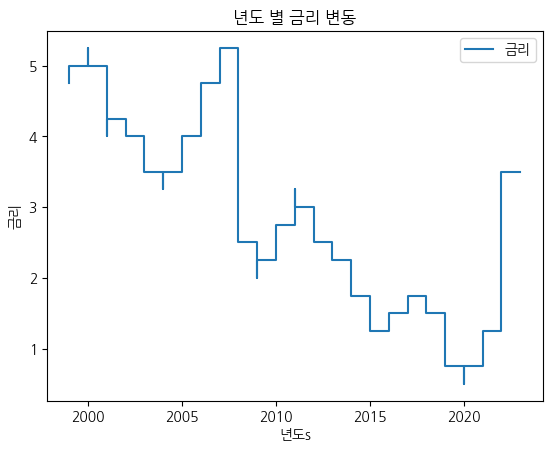

In [15]:
plt.step(x=interest_df["년도"],y =interest_df["기준금리"] , where='post', label='금리')

# 그래프 제목 및 축 레이블 설정
plt.title('년도 별 금리 변동')
plt.xlabel('년도s')
plt.ylabel('금리')

# 범례 표시
plt.legend()

# 그래프 보여주기
plt.show()